In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/vrutikshah/Documents/Work Related/QHack-EyeQ/demo1_dataset/odometry.csv')

In [4]:
df.columns

Index(['timestamp', ' frame', ' x', ' y', ' z', ' qx', ' qy', ' qz', ' qw'], dtype='object')

/var/folders/l3/9svtv8nj49j903063cl9b0b80000gn/T/ipykernel_97931/1089915303.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/Users/vrutikshah/miniconda/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


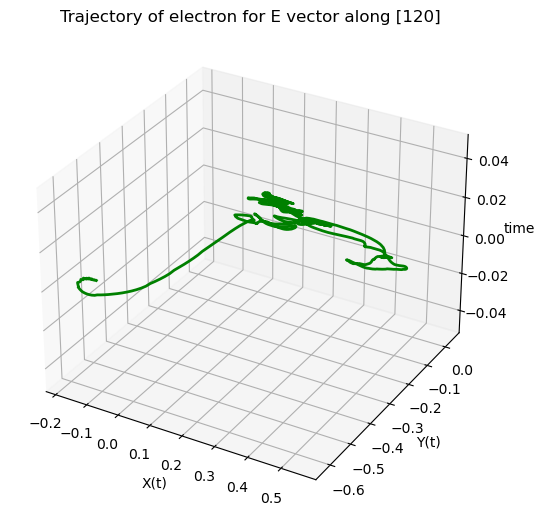

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 

# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[2:5, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
# THE DATA POINTS
# t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
# x = np.cos(t)-1
# y = 1/2*(np.cos(2*t)-1)
df = pd.read_csv('/Users/vrutikshah/Documents/Work Related/QHack-EyeQ/demo1_dataset/odometry.csv')
dataSet = np.array([df[' x'], df[' y']])
numDataPoints = len(df[' z'])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()

line = plt.plot(dataSet[0], dataSet[1], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(df,line), interval=200, blit=False)
#line_ani.save(r'AnimationNew.mp4')

plt.show()

In [6]:
numDataPoints

4325

KeyboardInterrupt: 

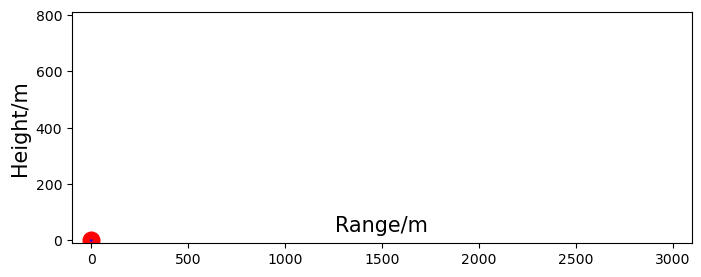

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from celluloid import Camera
# %matplotlib inline

# traj_X = np.genfromtxt('./Dataset/traj_X.csv', delimiter=',')
# traj_Y = np.genfromtxt('./Dataset/traj_Y.csv', delimiter=',')
df = pd.read_csv('/Users/vrutikshah/Documents/Work Related/QHack-EyeQ/demo1_dataset/odometry.csv')
dataSet = np.array([df[' x'], df[' y']])
traj_X, traj_Y = df[' x'].to_numpy(), df[' y'].to_numpy()
# Display a single trajectory
# fig, ax = plt.subplots(figsize=(8,3))

# ax.plot(traj_X[pick_traj,:],traj_Y[pick_traj,:],
#        color='b', lw=2, linestyle='--')
# ax.set(xlim=(-100, 3100), ylim=(-10, 810))
# ax.set_xlabel('Range/m', fontsize=15)
# ax.set_ylabel('Height/m', fontsize=15);

# Animate a single trajectory
pick_traj = 5      # Select a trajectory to simulate

# Set up the graph using Matplotlib
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlim=(-100, 3100), ylim=(-10, 810))
ax.set_ylabel('Height/m', fontsize=15)
ax.set_xlabel('Range/m', fontsize=15)
ax.get_xaxis().set_label_coords(0.5, 0.12)

# Initiate camera
camera = Camera(fig)

# Create individual frames
for j in range(1,traj_X.shape[0]+1):
    
    # Projectile's trajectory
    x = traj_X[0:j]
    y = traj_Y[0:j]
    
    # Show Projectile's location
    ax.plot(x[-1], y[-1], marker='o', markersize=12, markeredgecolor='r', markerfacecolor='r')
    
    # Show Projectile's trajectory
    ax.plot(x, y, color='b', lw=2, linestyle='--')
    
    # Capture frame
    camera.snap()

# Create animation
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Inline display
HTML(anim.to_html5_video())